In [12]:
import librosa
import numpy as np

In [42]:
y, sr = librosa.load(librosa.ex('trumpet'), mono=True, sr=22050)
zeros = np.append(y,np.zeros(22050*10-len(y)),axis=0)

In [43]:
S = librosa.feature.melspectrogram(y=zeros,sr=sr)
S.shape

(128, 431)

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [ ]:
import librosa
import librosa.display
import tkinter as tk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# tkinter 창 생성
root = tk.Tk()
root.title("음원 분석")

# 이미지를 업데이트할 함수
def update_image(file_path):
    # librosa를 사용하여 음원 읽기
    y, sr = librosa.load(file_path)

    # 멜 스펙트로그램 계산
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

    # 멜 스펙트로그램을 시각화
    plt.clf()  # 기존 그래프를 지우고 새 그래프를 생성
    plt.figure(figsize=(8, 4))
    librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.tight_layout()

# 파일을 읽어들이고 이미지를 업데이트하는 함수
def process_audio():
    # 파일 선택 대화상자를 통해 음원 파일 선택
    from tkinter import filedialog
    file_path = 'output.wav'
    
    if file_path:
        update_image(file_path)
        canvas.draw()

# "음원 처리" 버튼 생성
process_button = tk.Button(root, text="음원 처리", command=process_audio)
process_button.pack()

# Matplotlib 초기 그래프 생성
plt.figure(figsize=(8, 4))
plt.title('Mel Spectrogram')
canvas = FigureCanvasTkAgg(plt.gcf(), master=root)
canvas.get_tk_widget().pack()

# Tkinter 창 실행
root.mainloop()


In [ ]:
import numpy as np
import pyaudio
import matplotlib.pyplot as plt
from scipy import signal

# PyAudio 설정
p = pyaudio.PyAudio()

# 오디오 입력 설정
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100  # 샘플링 레이트 (Hz)
CHUNK = 1024  # 버퍼 크기

# 멜 스펙트로그램 설정
NFFT = 1024
NOVERLAP = 512
NUM_MEL_FILTERS = 40

# 그래프 설정
fig, ax = plt.subplots()

# 오디오 스트림 열기
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK,
                input_device_index=3)

# 멜 스펙트로그램 플로팅 함수
def plot_mel_spectrogram(data):
    f, t, Sxx = signal.spectrogram(data, fs=RATE, nperseg=NFFT, noverlap=NOVERLAP, nfft=NFFT)
    ax.clear()
    ax.imshow(10 * np.log10(Sxx), cmap='inferno', origin='lower', aspect='auto')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')
    ax.set_title('Mel Spectrogram')
    plt.pause(0.01)

try:
    print("실시간 오디오 스펙트로그램 시작...")
    while True:
        data = stream.read(CHUNK)
        data = np.frombuffer(data, dtype=np.int16)
        plot_mel_spectrogram(data)

except KeyboardInterrupt:
    print("실시간 오디오 스펙트로그램 종료")

finally:
    stream.stop_stream()
    stream.close()
    p.terminate()

plt.show()


In [1]:
import numpy as np


a = np.array([1,2,3,4,5,6,7])
a.size

7

In [3]:
a

array([1, 2, 3, 4, 5, 6, 7])

In [1]:
import librosa

y, sr = librosa.load('./output.wav', mono=True, sr=22050)

In [12]:
yy = librosa.effects.trim(y)[0]

In [15]:
yy.shape

(495616,)

In [16]:
y.shape

(495616,)

(0.0, 100.0)

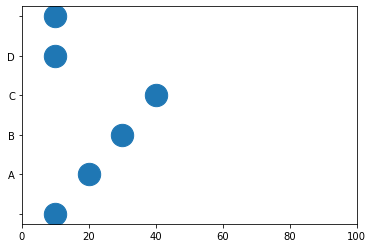

In [5]:
import matplotlib.pyplot as plt

y_positions = [0, 1, 2, 3, 4, 5]  # 예시: 4개의 포인트가 있고, 각각 A, B, C, D로 레이블되어 있다고 가정

# y축에 표시할 레이블
y_labels = ['','A', 'B', 'C', 'D','']

# x축 데이터
x_data = [10, 20, 30, 40, 10, 10]  # 예시: x축 데이터

plt.scatter(x_data, y_positions, s=500)

plt.yticks(y_positions, y_labels)

plt.xlim([0,100])

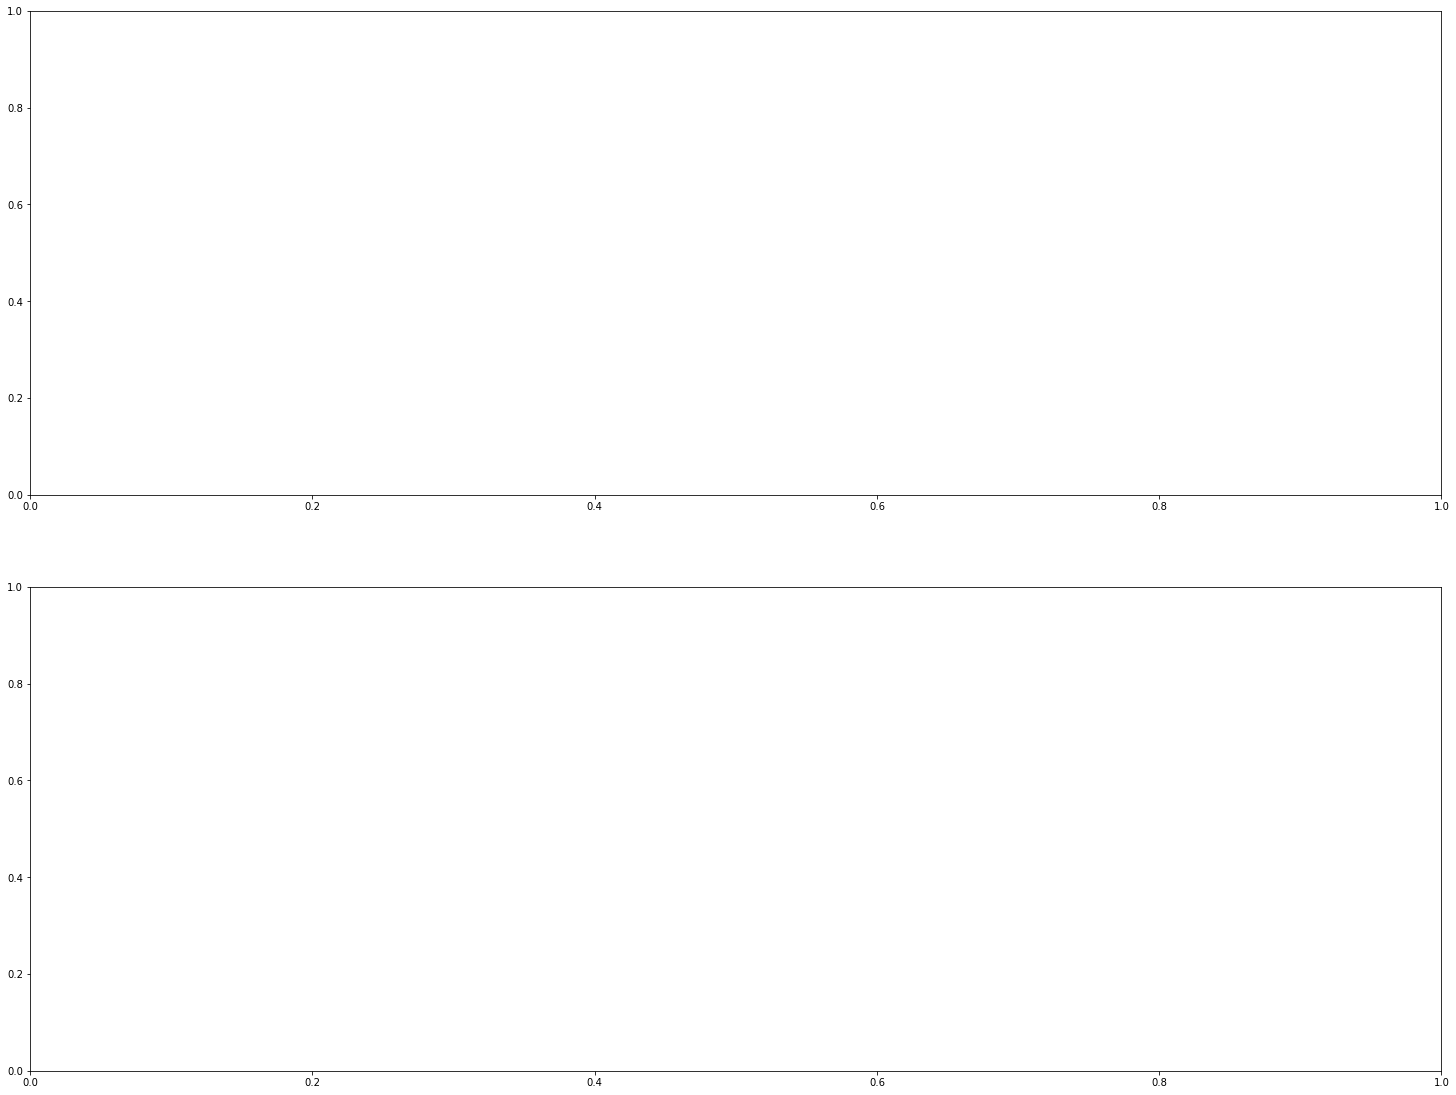

In [7]:
import matplotlib.pyplot as plt

# 첫 번째 차트
fig, ax1 = plt.subplots(figsize=(20, 16))  # 이미지의 높이를 2배로 늘림
ax1.set_position([0.01, 0.55, 0.98, 0.42])  # 상단 차트 위치 및 크기 조정
# ax1.axis('off')

# 두 번째 차트
ax2 = fig.add_axes([0.01, 0.05, 0.98, 0.42])  # 하단 차트 위치 및 크기 조정
# ax2.axis('off')

# 여기에 각각의 차트에 데이터를 추가하는 코드를 작성하세요.
# ax1에는 첫 번째 차트 데이터를, ax2에는 두 번째 차트 데이터를 추가해야 합니다.

# 예시 데이터 추가
# ax1.plot(x1, y1)  # 첫 번째 차트 데이터 추가
# ax2.plot(x2, y2)  # 두 번째 차트 데이터 추가

plt.show()